#### 과제0808
검색 키워드와 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터프레임 형태(컬럼은 title, url)로 출력해주는 크롤링 프로그램을 수행하세요.

In [1]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
news_df = pd.DataFrame(columns=['title','url'])
def search(keyword, num):
    title_list = []
    url_list = []
    news_df = pd.DataFrame(columns=['title','url'])
    for i in range(1, num+1, 10):
        url = 'https://search.naver.com/search.naver?where=news&query='+str(keyword)+'&start='+str(i)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        articles = soup.find_all('a',{'class':{'news_tit'}})
        for article in articles:
            newslink = article['href']
            url_list.append(newslink)
            title = article.text
            title_list.append(title)
    news_df.title = title_list
    news_df.url = url_list
    return news_df.iloc[:num].drop_duplicates(subset=['title', 'url'])



In [3]:
df = search('AI', 100)
df

,title,url
0,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
1,"김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의",https://www.yna.co.kr/view/AKR2022080810650006...
2,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
3,'2022 스마트농업 AI 경진대회' 개최,http://www.aflnews.co.kr/news/articleView.html...
4,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
...,...,...
95,"강기정 광주시장 ""여당이 AI반도체 단지 등 현안 힘써달라""",http://www.newsis.com/view/?id=NISX20220803_00...
96,김주하 AI가 전하는 8월 8일 뉴스7 예고,http://www.mbn.co.kr/pages/news/newsView.php?n...
97,시 쓰고 그림 그리고… 예술영역 넘보는 AI,https://www.seoul.co.kr/news/newsView.php?id=2...
98,"흥국생명·로완, AI 활용한 치매 예방 프로그램 업무협약 체결",http://www.asiaa.co.kr/news/articleView.html?i...


In [ ]:
# html = rq.get(url, headers=headers).text
#     bs = BeautifulSoup(html, 'lxml')
#     result_p += ' '.join(re.findall('[가-힣]+', str(bs.find_all('p'))))

# result_p


In [23]:
keyword = 'AI' 
num = 300
title_list = []
url_list = []
result = ''
news_df = pd.DataFrame(columns=['title','url'])
for i in range(1, num+1, 10):
    url = 'https://search.naver.com/search.naver?where=news&query='+str(keyword)+'&start='+str(i)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    articles = soup.select('#sp_nws1 > div.news_wrap.api_ani_send > div > div.news_info > div.info_group > a:nth-child(3)')
    for article in articles:
        newslink = article['href']
        url_list.append(newslink)
        title = article.text
        title_list.append(title)
    for body in url_list:
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        response = requests.get(body, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        result += ' '.join(re.findall('[가-힣]+', str(soup.select('#dic_area'))))
        
news_df.title = title_list
news_df.url = url_list
print(result)

가톨릭대 서울성모병원 각 업체 는 가톨릭대 서울성모병원과 형 당뇨 환자를 위한 디지털 트윈 기술을 개발한다고 일 밝혔다 디지털 트윈은 가상공간에 현실과 똑같은 쌍둥이를 만들어 발생할 수 있는 상황을 시뮬레이션해 결과를 예측하는 기술이다 와 서울성모병원은 각각 인공지능 역량과 의료 데이터를 결합한다는 계획이다 우선 는 서울성모병원이 연속혈당 측정기와 식이 앱 활동량 계 인슐린 펌프 등으로 수집한 당뇨 환자의 라이프로그를 활용해 식이 관리 솔루션과 진화형 인공췌장 알고리즘을 개발한다 식이 관리 솔루션은 영상인식 기술로 음식의 종류와 영양성분 칼로리 등을 자동 인식해 식단 관리를 돕는 기술이다 진화형 인공췌장 알고리즘은 알고리즘을 이용해 환자의 혈당에 맞게 주입될 인슐린의 양을 분석하는 기술이다 는 이 기술들로 디지털 트윈을 구현하면 당뇨 환자의 상태를 예측해 당뇨를 효과적으로 관리할 수 있을 것으로 기대했다 한자경 융합기술원 컨버전스연구소 상무는 산업 역량을 바탕으로 의료 분야의 여러 업체와 협력할 계획이다 라며 이를 통해 환자에게 실질적인 도움을 줄 수 있는 기술을 개발하고 일상에서 헬스케어 서비스를 확대하도록 노력하겠다 라고 말했다가톨릭대 서울성모병원 각 업체 는 가톨릭대 서울성모병원과 형 당뇨 환자를 위한 디지털 트윈 기술을 개발한다고 일 밝혔다 디지털 트윈은 가상공간에 현실과 똑같은 쌍둥이를 만들어 발생할 수 있는 상황을 시뮬레이션해 결과를 예측하는 기술이다 와 서울성모병원은 각각 인공지능 역량과 의료 데이터를 결합한다는 계획이다 우선 는 서울성모병원이 연속혈당 측정기와 식이 앱 활동량 계 인슐린 펌프 등으로 수집한 당뇨 환자의 라이프로그를 활용해 식이 관리 솔루션과 진화형 인공췌장 알고리즘을 개발한다 식이 관리 솔루션은 영상인식 기술로 음식의 종류와 영양성분 칼로리 등을 자동 인식해 식단 관리를 돕는 기술이다 진화형 인공췌장 알고리즘은 알고리즘을 이용해 환자의 혈당에 맞게 주입될 인슐린의 양을 분석하는 기술이다 는 이 기술들로 디지털 트윈을 구현하면 당뇨

In [24]:
# import re
# text = re.sub('[^가-힣]+', ' ',str(title_list) )
# print(len(text))
# text
len(result)

203140

In [25]:
with open('notuse.txt','rt',encoding='UTF8') as f:
    rl = f.readlines()

file = re.sub('[^가-힣]',' ', str(rl))
file = re.sub('\s+',' ', file)
file

' 홈페이지 과학 이나 건의 성장 단계 대신 구독 시민 군호 연구소장 영등포구 반면 고민 사격 전세 동향 나노 생산 차질 추격 노사 창사 임금 촉각 경기 이전 세상 모바일 활성화 또한 인수 주최 중학교 격차 기존 전투 여단 주제 유기 포함 방식 구성 조성 최영석 한정호 실장 전현정 김필수 대출 소비자 입자 구합 설마 김주현 신성 자립 혜주 여명 단체 메시 버넥트 하태진 크리에이티브 콘테스트 팩토리 리딩 여의 장치 씨게이트 유니온 커뮤니티 런던 유럽 큐어 링크 정보보호 주름 플립 하나은행 다누리 교신 배트 크랭크 직전 폐기 수도권 거점 오피스 인더스 트리 인사이트 인텔리전트 하이퍼 오토메이션 생방송 코리아 그랜드 서밋 컨택 컨퍼런스 개선 의견 은행 위원 효과 대학생 포럼 연합뉴스 필수 행사 서울시 특집 판결 서머 랠리 닥치 조각 한자리 빙상 연맹 정재웅 정재원 헤드라인 임명 여의도 국교 안전원 기자회견 당직 반발 국위 격랑 폐단 벌써 민생 내일 중부 남부 국유 토지 매각 집회 불허 위헌 부정 육박 여론조사 남녀 지지도 전주 주간 직무 박지원 민심 빈손 복귀 박용진 악수 잡고 각료 교체 쇄신 경찰 방장 불법 난타 물가 노동부 연방 동월 단행 다우존스 서해 서도 실탄 고래 싸움 새우등 시험대 그간 권법 본격 용산 대통령실 토큰 자본시장 규율 일관 확립 타당성 정당성 바이든 행정명령 호조 빅스 코스피 연말 소녀시대 에스엠 질환 헬스 데이 보스 택시 보험 사기 연상 여사 표절 피해자 폭우 북부 연천 필승 시내 응급실 한라 종합병원 내시경 당초 항공권 부상 통계청 캄보디아 자랑 방역 어가 예술인 예술 문화재단 조직 보령 유혹 먹거리 서경덕 형님 조상 정복 나이 도사 통운 되뇌었다 년생 족적 노스캐롤라이나주 그린즈버러 세지 필드 컨트리클럽 시즌 정규 라운드 이글 버디 합계 더파 임성재 재미교포 스피드스케이팅 죄송 출석 최연 정상 등장 연장 준우승 전인 그랜드슬램 도전 임영웅 왕전 백혈병 기부 수첩 잔류 농약 정쟁 도구 수신료 존폐 언제 피플 이정재 관상 전성 인생 재패니즈

In [29]:
from konlpy.tag import Okt
import pandas as pd
okt = Okt()

stop_words = file

word_token = okt.morphs(result)

s = [word for word in word_token if not word in stop_words]
s

['가톨릭대',
 '가톨릭대',
 '당뇨',
 '환자',
 '디지털',
 '한다고',
 '밝혔다',
 '디지털',
 '가상공간',
 '똑같은',
 '쌍둥이',
 '만들어',
 '발생',
 '있는',
 '상황',
 '시뮬레이션',
 '결과',
 '예측',
 '지능',
 '역량',
 '의료',
 '결합',
 '한다는',
 '계획',
 '연속',
 '혈당',
 '측정기',
 '앱',
 '인슐린',
 '펌프',
 '당뇨',
 '환자',
 '라이프',
 '솔루션',
 '진화',
 '췌장',
 '알고리즘',
 '솔루션',
 '영상',
 '종류',
 '영양성분',
 '칼로리',
 '식단',
 '돕는',
 '진화',
 '췌장',
 '알고리즘',
 '알고리즘',
 '환자',
 '혈당',
 '맞게',
 '주입',
 '인슐린',
 '분석',
 '디지털',
 '당뇨',
 '환자',
 '예측',
 '당뇨',
 '있을',
 '기대했다',
 '융합기술원',
 '컨버전',
 '상무',
 '역량',
 '의료',
 '분야',
 '협력',
 '계획',
 '라며',
 '이를',
 '환자',
 '있는',
 '확대',
 '하겠다',
 '라고',
 '했다',
 '가톨릭대',
 '가톨릭대',
 '당뇨',
 '환자',
 '디지털',
 '한다고',
 '밝혔다',
 '디지털',
 '가상공간',
 '똑같은',
 '쌍둥이',
 '만들어',
 '발생',
 '있는',
 '상황',
 '시뮬레이션',
 '결과',
 '예측',
 '지능',
 '역량',
 '의료',
 '결합',
 '한다는',
 '계획',
 '연속',
 '혈당',
 '측정기',
 '앱',
 '인슐린',
 '펌프',
 '당뇨',
 '환자',
 '라이프',
 '솔루션',
 '진화',
 '췌장',
 '알고리즘',
 '솔루션',
 '영상',
 '종류',
 '영양성분',
 '칼로리',
 '식단',
 '돕는',
 '진화',
 '췌장',
 '알고리즘',
 '알고리즘',
 '환자',
 '혈당',
 '맞게',
 '주입',
 '인슐린',
 '분석',
 '디지털',
 '당뇨'

In [30]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(str(s))
noun_list = []
for word, tag in morph:
    if (tag=='Noun')& (len(word)>1):
        noun_list.append(word)
# print(morph)
print(noun_list)

['가톨릭대', '가톨릭대', '당뇨', '환자', '디지털', '디지털', '가상공간', '쌍둥이', '발생', '상황', '시뮬레이션', '결과', '예측', '지능', '역량', '의료', '결합', '계획', '연속', '혈당', '측정기', '인슐린', '펌프', '당뇨', '환자', '라이프', '솔루션', '진화', '췌장', '알고리즘', '솔루션', '영상', '종류', '영양성분', '칼로리', '식단', '진화', '췌장', '알고리즘', '알고리즘', '환자', '혈당', '주입', '인슐린', '분석', '디지털', '당뇨', '환자', '예측', '당뇨', '융합기술원', '컨버전', '상무', '역량', '의료', '분야', '협력', '계획', '라며', '환자', '확대', '가톨릭대', '가톨릭대', '당뇨', '환자', '디지털', '디지털', '가상공간', '쌍둥이', '발생', '상황', '시뮬레이션', '결과', '예측', '지능', '역량', '의료', '결합', '계획', '연속', '혈당', '측정기', '인슐린', '펌프', '당뇨', '환자', '라이프', '솔루션', '진화', '췌장', '알고리즘', '솔루션', '영상', '종류', '영양성분', '칼로리', '식단', '진화', '췌장', '알고리즘', '알고리즘', '환자', '혈당', '주입', '인슐린', '분석', '디지털', '당뇨', '환자', '예측', '당뇨', '융합기술원', '컨버전', '상무', '역량', '의료', '분야', '협력', '계획', '라며', '환자', '확대', '규모', '고객', '클라우드', '솔루션', '정보통신부', '지능', '정보사회', '추진', '지능', '분야', '수행', '지능', '지능', '국가', '공개', '지능', '이번', '고객', '주소', '음성', '생활환경', '소음', '산림', '수종', '스캐닝', '모델링', '이매패류', '분야', '지난해', '영상', '분야', '고

In [31]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', family = 'Malgun Gothic') #한글 폰트 설정
count = Counter(noun_list)
data = dict(count.most_common())
print(data)

{'지능': 565, '시스템': 399, '분야': 390, '분석': 321, '솔루션': 209, '대교': 207, '채용': 187, '극단': 184, '선택': 184, '예방': 184, '제공': 177, '환자': 171, '클라우드': 162, '관련': 160, '역량': 155, '행동': 155, '대회': 140, '이번': 137, '알고리즘': 135, '영상': 128, '디지털': 127, '수행': 125, '보안': 121, '당뇨': 120, '계획': 120, '고객': 116, '예측': 113, '식물': 112, '재배': 112, '플랫폼': 108, '삼성': 105, '빅데이터': 104, '경력': 102, '모집': 102, '마련': 100, '금융위': 100, '규모': 97, '상황': 96, '진화': 95, '결과': 90, '결합': 90, '앵커': 88, '현대차': 85, '라며': 83, '의료': 81, '내용': 76, '명화': 72, '모네': 72, '작품': 72, '적용': 67, '키드': 66, '마크': 66, '확대': 64, '혁신': 63, '규제': 62, '라이브러리': 61, '방침': 61, '가톨릭대': 60, '혈당': 60, '인슐린': 60, '췌장': 60, '맞춤': 60, '방안': 60, '반도체': 60, '모방': 60, '데이터베이스': 56, '중심': 55, '김주하': 55, '현재': 52, '부문': 51, '발생': 50, '지난해': 50, '엑스': 50, '한쪽': 48, '추진': 47, '음성': 46, '사회': 46, '김소영': 45, '린지': 45, '자국': 44, '신뢰': 42, '제도': 42, '안내서': 41, '리스크': 40, '정교': 40, '기능': 40, '증가': 40, '사의': 40, '풍경': 36, '스타일': 36, '확인': 35, '전환': 35, '표현': 35, '배터리

(-0.5, 7999.5, 3999.5, -0.5)

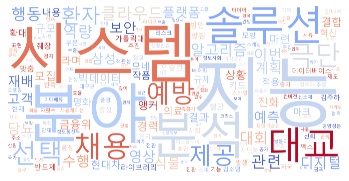

In [32]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='./malgun.ttf', 
                      background_color = 'white',
                      colormap = 'coolwarm', 
                      width=8000, height=4000,
                      prefer_horizontal = True).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')